In [15]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("health.data.ny.gov", 
                "QQWlaoGFZYkDunsiGCH6mFvsO")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(health.data.ny.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("u4ud-w55t", limit = 4000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [16]:
import seaborn as sns
from eda import EDA
import matplotlib.pyplot as plt
results_df.columns

Index(['hospital_service_area', 'hospital_county',
       'operating_certificate_number', 'facility_id', 'facility_name',
       'age_group', 'zip_code_3_digits', 'gender', 'race', 'ethnicity',
       'length_of_stay', 'type_of_admission', 'patient_disposition',
       'discharge_year', 'ccs_diagnosis_code', 'ccs_diagnosis_description',
       'ccs_procedure_code', 'ccs_procedure_description', 'apr_drg_code',
       'apr_drg_description', 'apr_mdc_code', 'apr_mdc_description',
       'apr_severity_of_illness_code', 'apr_severity_of_illness_description',
       'apr_risk_of_mortality', 'apr_medical_surgical_description',
       'source_of_payment_1', 'source_of_payment_2', 'source_of_payment_3',
       'birth_weight', 'abortion_edit_indicator',
       'emergency_department_indicator', 'total_charges', 'total_costs'],
      dtype='object')

In [17]:
results_df.head()

,hospital_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_risk_of_mortality,apr_medical_surgical_description,source_of_payment_1,source_of_payment_2,source_of_payment_3,birth_weight,abortion_edit_indicator,emergency_department_indicator,total_charges,total_costs
0,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,30 to 49,121,F,Other Race,Not Span/Hispanic,...,Minor,Surgical,Medicaid,Medicaid,Self-Pay,0000,N,N,22862.69,10162.05
1,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,70 or Older,120,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Self-Pay,0000,N,N,37811.50,4562.08
2,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,30 to 49,123,F,White,Not Span/Hispanic,...,Minor,Surgical,Blue Cross/Blue Shield,Self-Pay,NaN,0000,N,N,16464.90,7303.99
3,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,30 to 49,121,F,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,Self-Pay,NaN,0000,N,N,10510.69,4574.32
4,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,30 to 49,128,F,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,Self-Pay,NaN,0000,N,N,5788.94,2311.01


In [4]:
#convert charges and costs into numeric
numeric_cols = ['total_charges','total_costs', 'length_of_stay']
results_df[numeric_cols ] = results_df[numeric_cols ].apply(pd.to_numeric, errors='coerce')
categorical_cols = ['gender','race','ethnicity','type_of_admission']
results_df[categorical_cols] = results_df[categorical_cols].astype('category')

In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 34 columns):
hospital_service_area                  4000 non-null object
hospital_county                        4000 non-null object
operating_certificate_number           4000 non-null object
facility_id                            4000 non-null object
facility_name                          4000 non-null object
age_group                              4000 non-null object
zip_code_3_digits                      3973 non-null object
gender                                 4000 non-null category
race                                   4000 non-null category
ethnicity                              4000 non-null category
length_of_stay                         3992 non-null float64
type_of_admission                      4000 non-null category
patient_disposition                    4000 non-null object
discharge_year                         4000 non-null object
ccs_diagnosis_code                     4000 

In [6]:
results_df.describe()

,length_of_stay,total_charges,total_costs
count,3992.000000,4.000000e+03,4000.000000
mean,6.628758,5.397128e+04,18019.178408
std,11.285034,9.840055e+04,27962.342183
min,1.000000,1.350000e+02,34.410000
25%,2.000000,1.310353e+04,4773.295000
50%,3.000000,2.783228e+04,10264.170000
75%,6.000000,5.183691e+04,19688.020000
max,117.000000,1.293615e+06,445501.470000


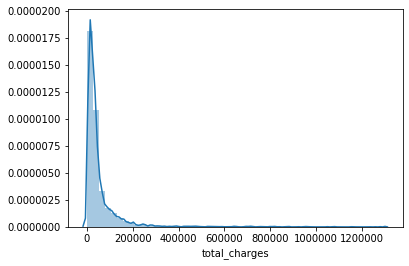

In [7]:
sns.distplot(results_df['total_charges'])

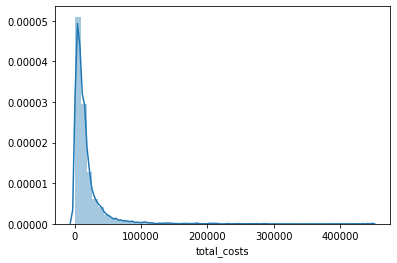

In [8]:
sns.distplot(results_df['total_costs'])

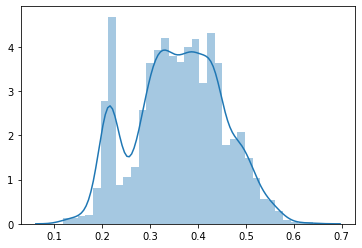

In [9]:
sns.distplot(results_df['total_costs'] / results_df['total_charges'])

In [10]:
results_df[['age_group','gender','race','length_of_stay','total_charges','total_costs']].corr()

,length_of_stay,total_charges,total_costs
length_of_stay,1.000000,0.851835,0.768652
total_charges,0.851835,1.000000,0.951395
total_costs,0.768652,0.951395,1.000000


Preview of data:


,hospital_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_risk_of_mortality,apr_medical_surgical_description,source_of_payment_1,source_of_payment_2,source_of_payment_3,birth_weight,abortion_edit_indicator,emergency_department_indicator,total_charges,total_costs
0,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,30 to 49,121,F,Other Race,Not Span/Hispanic,...,Minor,Surgical,Medicaid,Medicaid,Self-Pay,0000,N,N,22862.69,10162.05
1,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,70 or Older,120,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Self-Pay,0000,N,N,37811.50,4562.08
2,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,30 to 49,123,F,White,Not Span/Hispanic,...,Minor,Surgical,Blue Cross/Blue Shield,Self-Pay,NaN,0000,N,N,16464.90,7303.99



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 34 columns):
hospital_service_area                  4000 non-null object
hospital_county                        4000 non-null object
operating_certificate_number           4000 non-null object
facility_id                            4000 non-null object
facility_name                          4000 non-null object
age_group                              4000 non-null object
zip_code_3_digits                      3973 non-null object
gender                                 4000 non-null category
race                                   4000 non-null category
ethnicity                              4000 non-null category
length_of_stay                         3992 non-null float64
type_of_admission                      4000 non-null category
patient_disposition                    4000 non-null object
discharge_year       

,hospital_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_risk_of_mortality,apr_medical_surgical_description,source_of_payment_1,source_of_payment_2,source_of_payment_3,birth_weight,abortion_edit_indicator,emergency_department_indicator,total_charges,total_costs
2,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,30 to 49,123,F,White,Not Span/Hispanic,...,Minor,Surgical,Blue Cross/Blue Shield,Self-Pay,NaN,0000,N,N,16464.90,7303.99
3,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,30 to 49,121,F,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,Self-Pay,NaN,0000,N,N,10510.69,4574.32
4,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,30 to 49,128,F,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,Self-Pay,NaN,0000,N,N,5788.94,2311.01


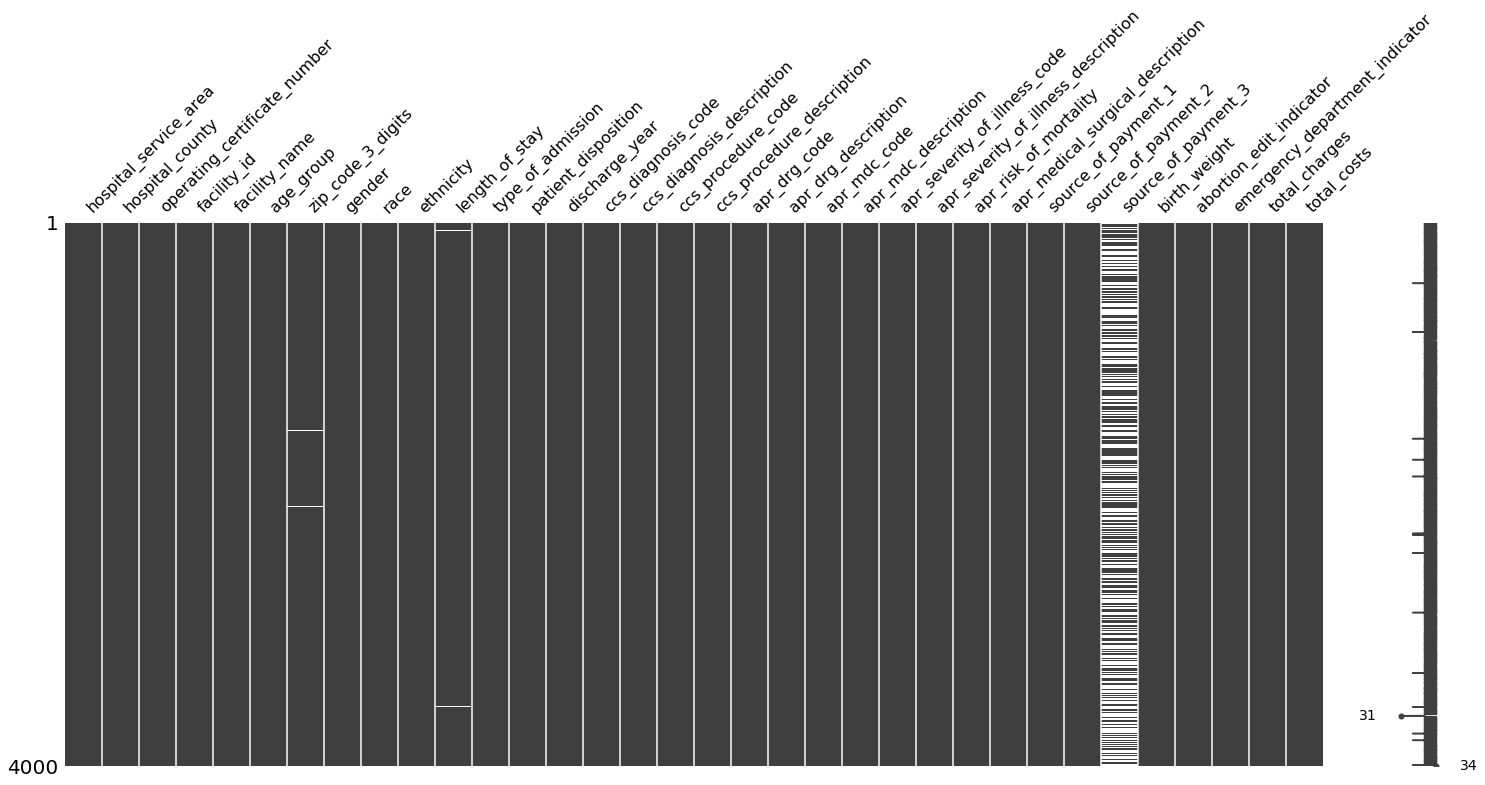


***Number of duplicated entries:  2


,hospital_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_risk_of_mortality,apr_medical_surgical_description,source_of_payment_1,source_of_payment_2,source_of_payment_3,birth_weight,abortion_edit_indicator,emergency_department_indicator,total_charges,total_costs
1298,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,120,M,Other Race,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,Self-Pay,NaN,2400,N,N,6411.43,1399.41
1299,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,120,M,Other Race,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,Self-Pay,NaN,2400,N,N,6411.43,1399.41
1083,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,122,F,Black/African American,Not Span/Hispanic,...,Minor,Medical,Medicaid,Medicaid,Self-Pay,3200,N,N,3426.00,731.38
1475,Capital/Adirond,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,122,F,Black/African American,Not Span/Hispanic,...,Minor,Medical,Medicaid,Medicaid,Self-Pay,3200,N,N,3426.00,731.38



To check: 
Unique count of non-numeric data

hospital_service_area                    1
hospital_county                          1
operating_certificate_number             1
facility_id                              1
facility_name                            1
age_group                                5
zip_code_3_digits                       27
gender                                   2
race                                     3
ethnicity                                2
type_of_admission                        4
patient_disposition                     14
discharge_year                           1
ccs_diagnosis_code                     206
ccs_diagnosis_description              206
ccs_procedure_code                     154
ccs_procedure_description              154
apr_drg_code                           253
apr_drg_description                    253
apr_mdc_code                            26
apr_mdc_description                     26
apr_severity_of_illness_code             5
apr_seve

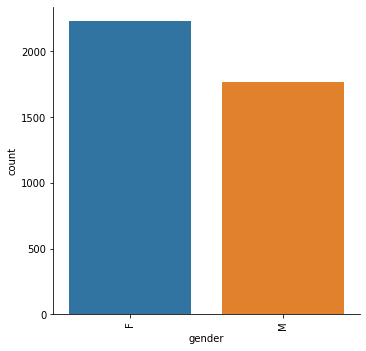

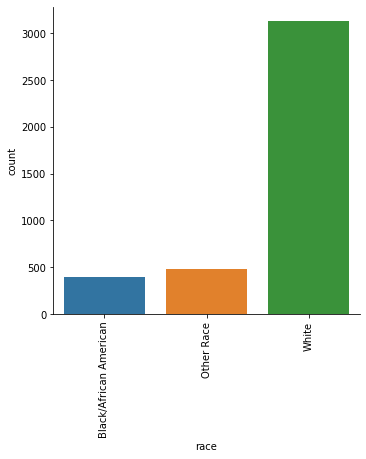

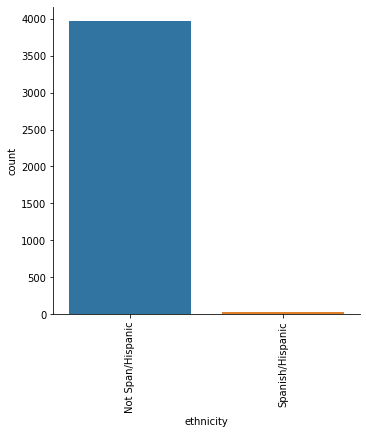

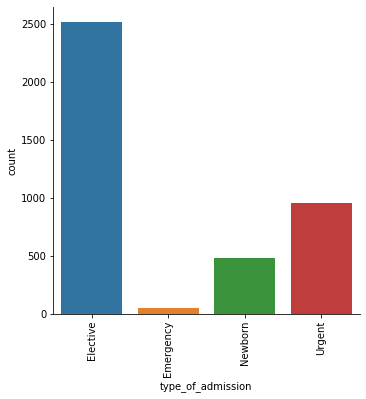


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
length_of_stay,3992.0,6.628758,11.285034,1.00,2.000,3.000,6.0000,117.00
total_charges,4000.0,53971.282023,98400.551883,135.00,13103.530,27832.275,51836.9075,1293614.94
total_costs,4000.0,18019.178408,27962.342183,34.41,4773.295,10264.170,19688.0200,445501.47


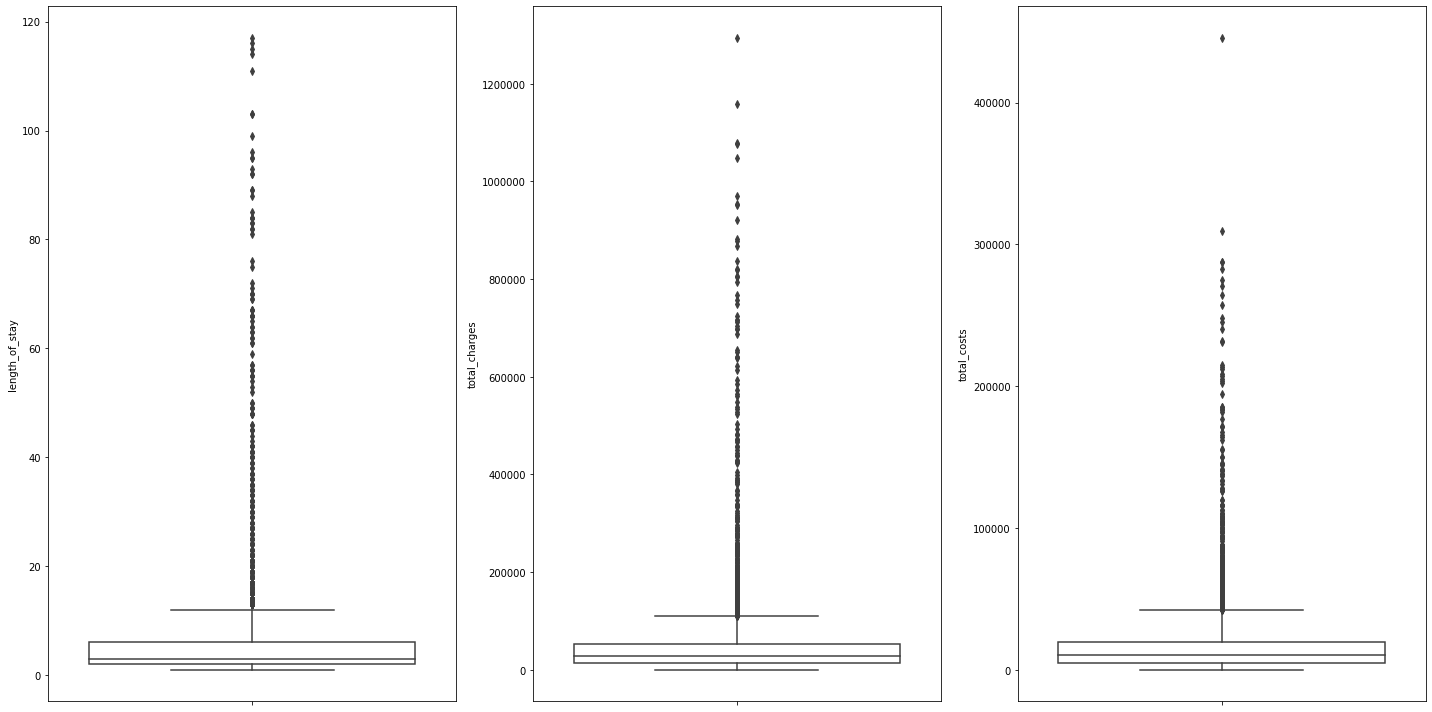

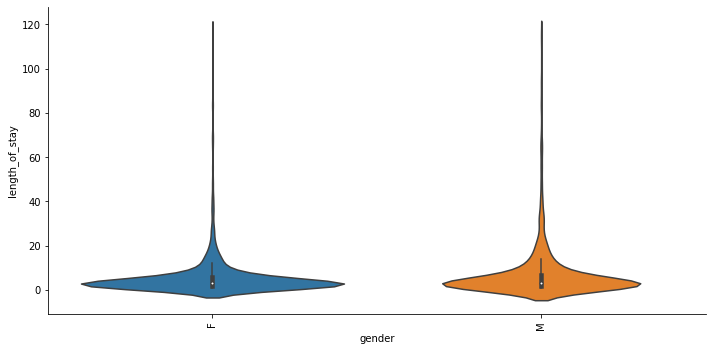

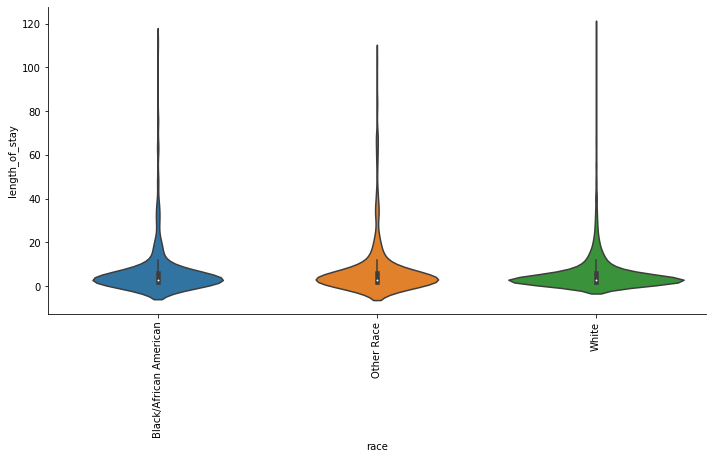

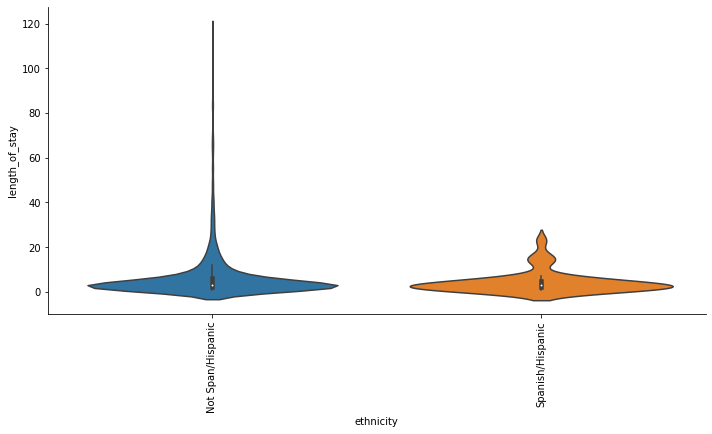

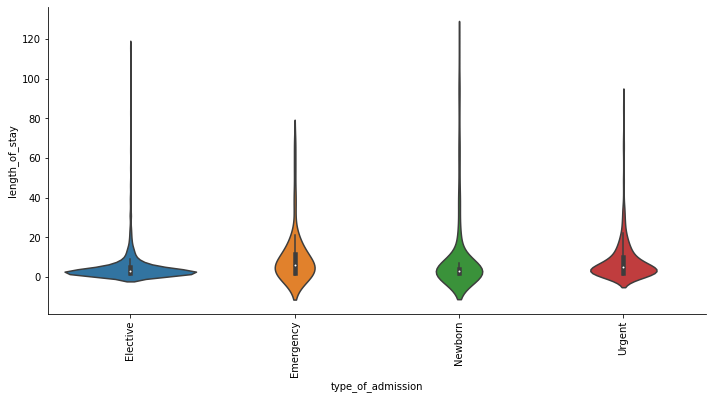

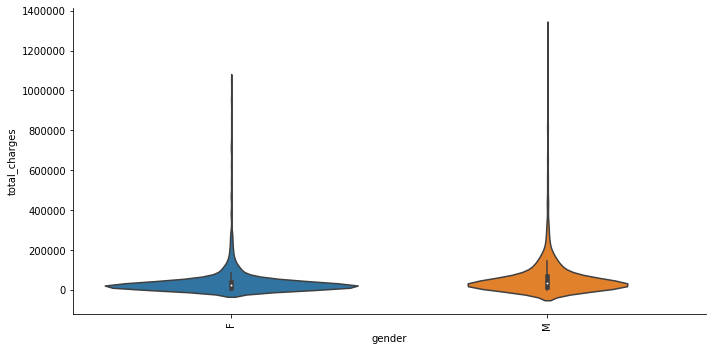

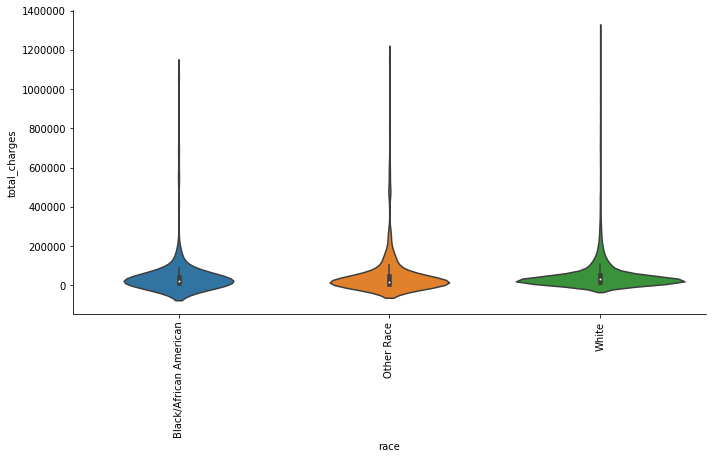

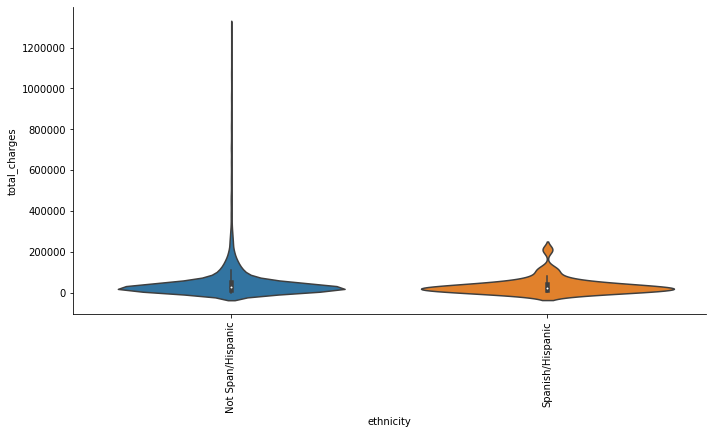

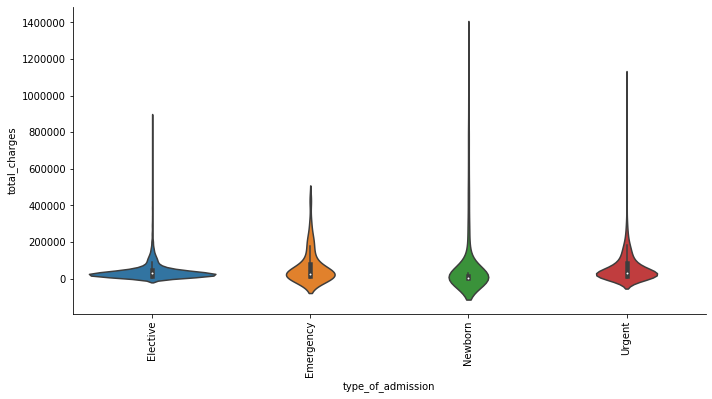

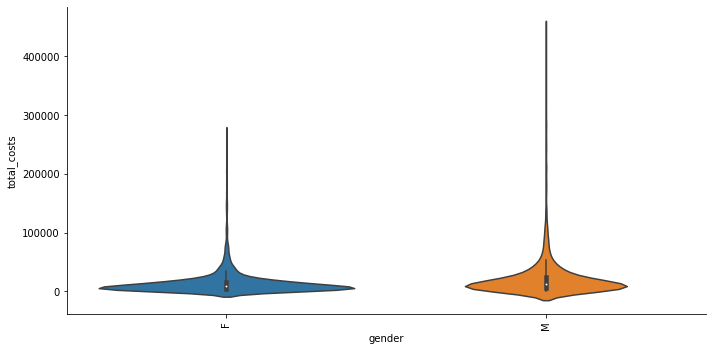

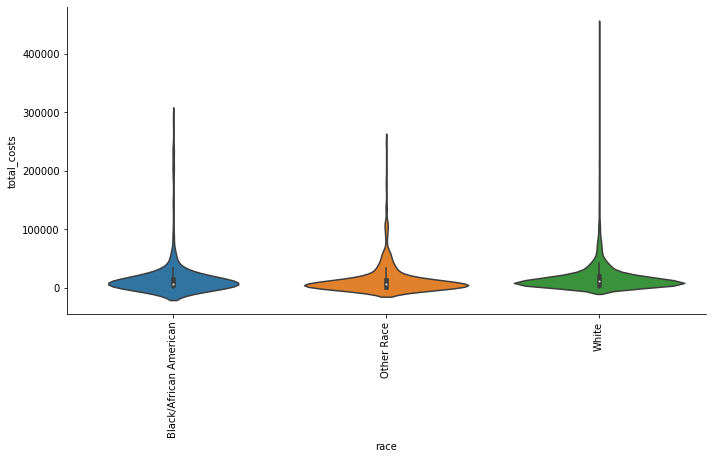

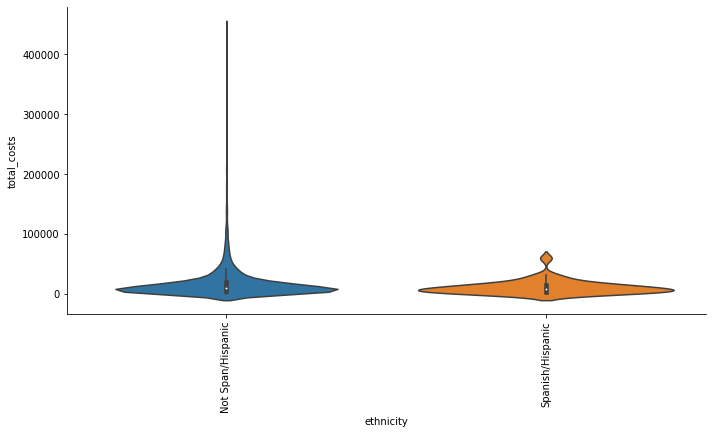

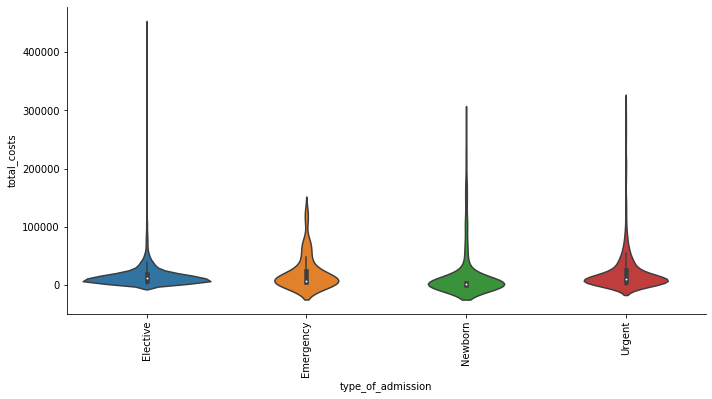


To check pairwise joint distribution of numeric data


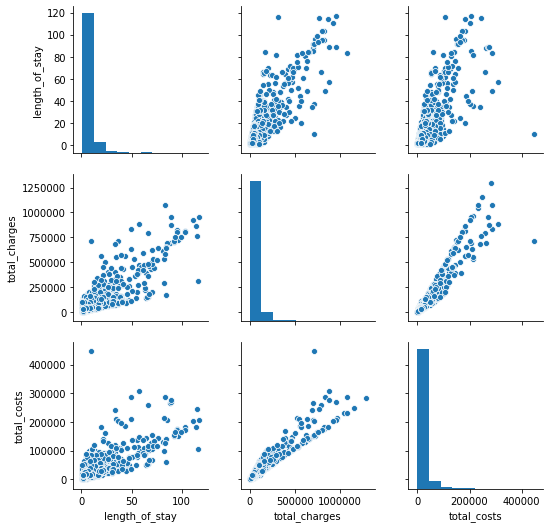


To check time series of numeric data  by daily, monthly and yearly frequency


In [11]:
EDA(results_df)